In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [6]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Data Preprocessing

In [7]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Clothing ID', axis = 1)

In [8]:
df['Review'] = df['Title'] + ' ' + df['Review Text']

In [9]:
df = df.drop(['Title','Review Text'], axis = 1)
df.isnull().sum()

Age                           0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
Review                     3811
dtype: int64

In [10]:
df = df.dropna(subset = ['Review'])
df = df.dropna(subset = ['Division Name'])

In [11]:
df.isnull().sum()

Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Review                     0
dtype: int64

In [12]:
# Checking for outliers.

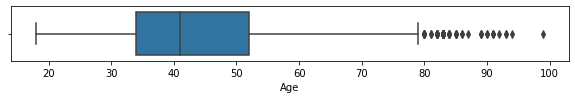

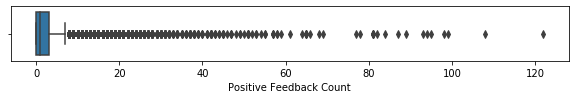

In [13]:
for i in ['Age','Positive Feedback Count']:
    plt.figure(figsize = (10,1))
    sns.boxplot(data = df, x = i)
    plt.show()

In [14]:
#   Applying Square root transform.
for i in ['Age','Positive Feedback Count']:
    df[i] = df[i].apply(lambda x : np.sqrt(x))

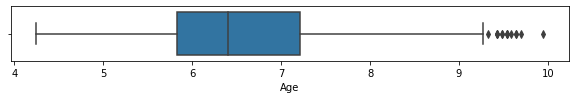

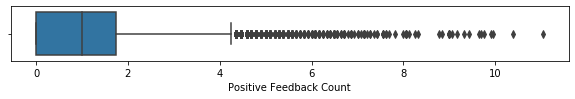

In [15]:
for i in ['Age','Positive Feedback Count']:
    plt.figure(figsize = (10,1))
    sns.boxplot(data = df, x = i)
    plt.show()

In [16]:
# again Applying Square root transform.
for i in ['Age','Positive Feedback Count']:
    df[i] = df[i].apply(lambda x : np.sqrt(x))

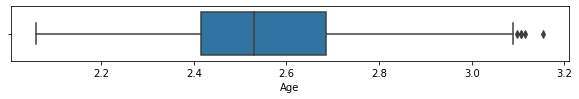

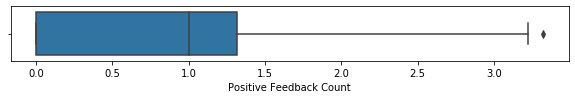

In [17]:
for i in ['Age','Positive Feedback Count']:
    plt.figure(figsize = (10,1))
    sns.boxplot(data = df, x = i)
    plt.show()

In [18]:
df = pd.get_dummies(df, columns = ['Division Name','Department Name','Class Name'], drop_first = True)

In [19]:
df.head(2)

,Age,Rating,Recommended IND,Positive Feedback Count,Review,Division Name_General Petite,Division Name_Initmates,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
2,2.783158,3,0,0.0,Some major design flaws I had such high hopes ...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.659148,5,1,0.0,"My favorite buy! I love, love, love this jumps...",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
df['Review'].head()

2    Some major design flaws I had such high hopes ...
3    My favorite buy! I love, love, love this jumps...
4    Flattering shirt This shirt is very flattering...
5    Not for the very petite I love tracy reese dre...
6    Cagrcoal shimmer fun I aded this in my basket ...
Name: Review, dtype: object

#              Review Text Handling :
##                 a)Text Preprocessing-ReGEX
##                 b)  Lemmatization using nltk
##                 c)  Lemmatization using spacy---*
##                 d)  Base model 
##                 e) Vectorization  by TF-IDF
##                 f) Vectorization by word2vec 
##                 g) Vectorization by BOW 


In [21]:
df['Review']

2        Some major design flaws I had such high hopes ...
3        My favorite buy! I love, love, love this jumps...
4        Flattering shirt This shirt is very flattering...
5        Not for the very petite I love tracy reese dre...
6        Cagrcoal shimmer fun I aded this in my basket ...
                               ...                        
23481    Great dress for many occasions I was very happ...
23482    Wish it was made of cotton It reminds me of ma...
23483    Cute, but see through This fit well, but the t...
23484    Very cute dress, perfect for summer parties an...
23485    Please make more like this one! This dress in ...
Name: Review, Length: 19662, dtype: object

## a) Text Preprocessing  -ReGEX

In [22]:
import re
def regex(string):
    s1 = re.sub('[^a-zA-Z\s]','',string)
    s1 = re.sub(r'\[[0-9]*\]',' ',s1)
    s1=s1.lower() 
    return re.sub(r'[\d_]+','',s1)

In [23]:
df['Review'] = df['Review'].apply(regex)

In [24]:
 df['Review'][0:1]

2    some major design flaws i had such high hopes ...
Name: Review, dtype: object

## b)   Lemmatization using nltk

In [25]:
import nltk
from nltk.corpus import stopwords
#nltk.download('punkt')

J:\Anaconda\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
J:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

In [26]:
from nltk.stem.wordnet import WordNetLemmatizer
le = WordNetLemmatizer()
def WordNetLemmatizer(text):  
    le_text = [le.lemmatize(word) for word in text.split()]
    return " ".join(le_text)     

In [27]:
df['Review'] = df['Review'].apply(WordNetLemmatizer) 

  ## d)  Base model 

In [28]:
x = df['Review']
y = df['Recommended IND']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
def model_eval(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    
    y_train_pred = algo.predict(xtrain)
    y_train_prob = algo.predict_proba(xtrain)[:,1]
    y_test_pred = algo.predict(xtest)
    y_test_prob = algo.predict_proba(xtest)[:,1]

    print('Accuracy Score Train : ', accuracy_score(ytrain,y_train_pred))
    print('Classification Report for Train : \n', classification_report(ytrain,y_train_pred))
    print('AUC ROC Train : ', roc_auc_score(ytrain,y_train_prob))
    print('Confusion Matrix for Test : \n', confusion_matrix(ytrain,y_train_pred))
        
    print('Accuracy Score Test : ', accuracy_score(ytest,y_test_pred))
    print('Classification Report for Test : \n', classification_report(ytest,y_test_pred))
    print('AUC ROC Test : ', roc_auc_score(ytest,y_test_prob))
    print('Confusion Matrix for Test : \n', confusion_matrix(ytest,y_test_pred))

##  e)  Vectorization using TF-IDF


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range = (1,1), stop_words = 'english')
X_train_tf_idf = tfidf.fit_transform(X_train)
X_test_tf_idf = tfidf.transform(X_test)

In [33]:
for i in  X_train_tf_idf[0:1]:
    print(i)
    
#displaying vectors of the  first row of review 

  (0, 3523)	0.5020930032031599
  (0, 1703)	0.44918295573883454
  (0, 3514)	0.24114644091650322
  (0, 11554)	0.3910918819600952
  (0, 8466)	0.29735489922937525
  (0, 341)	0.4966013352888394


In [34]:
for i in  X_train[0:1].str.split(' '):
    print(i)
#  review column

['amazing', 'perfect', 'summer', 'dress', 'this', 'is', 'a', 'must', 'buy', 'it', 'can', 'be', 'dressed', 'up', 'or', 'down']


In [35]:
model_eval(lr,X_train_tf_idf,X_test_tf_idf, y_train, y_test)

Accuracy Score Train :  0.9164426360531861
Classification Report for Train : 
               precision    recall  f1-score   support

           0       0.88      0.62      0.73      2466
           1       0.92      0.98      0.95     11297

    accuracy                           0.92     13763
   macro avg       0.90      0.80      0.84     13763
weighted avg       0.91      0.92      0.91     13763

AUC ROC Train :  0.967455527420417
Confusion Matrix for Test : 
 [[ 1532   934]
 [  216 11081]]
Accuracy Score Test :  0.898287845397525
Classification Report for Test : 
               precision    recall  f1-score   support

           0       0.85      0.56      0.67      1109
           1       0.91      0.98      0.94      4790

    accuracy                           0.90      5899
   macro avg       0.88      0.77      0.81      5899
weighted avg       0.89      0.90      0.89      5899

AUC ROC Test :  0.9480566102735073
Confusion Matrix for Test : 
 [[ 623  486]
 [ 114 4676]]


J:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
J:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

In [36]:
val="bad"
p=tfidf.transform([val])
lr.predict(p)

J:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0], dtype=int64)

In [37]:
val="good"
p=tfidf.transform([val])
q=lr.predict(p)

J:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [38]:
print(q)

[1]


## f) Vectorization by word2vec

In [39]:
#conda install -c anaconda gensim
# or install directly from anaconda ide
#
import gensim

J:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [40]:
from gensim.models import Word2Vec

In [41]:
Review_coulmn_tokensiz= df['Review'].apply(lambda x: x.split()) # tokenizing Review column
# lemma havent applied  due to error


In [42]:
W2V_model=Word2Vec(Review_coulmn_tokensiz, min_count=2)  

In [43]:
W2V_model.most_similar(positive="good")

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('great', 0.8003445267677307),
 ('nice', 0.713800311088562),
 ('excellent', 0.6678763031959534),
 ('poor', 0.626145601272583),
 ('fantastic', 0.6056458353996277),
 ('high', 0.5981118083000183),
 ('fabulous', 0.585537850856781),
 ('terrible', 0.5788165330886841),
 ('amazing', 0.5641697645187378),
 ('ok', 0.5515357255935669)]

In [44]:
W2V_model.most_similar(positive="bad")

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('busy', 0.6723496317863464),
 ('wrinkleprone', 0.6470484733581543),
 ('disappointing', 0.6429738402366638),
 ('shortbut', 0.6346117854118347),
 ('low', 0.5922458171844482),
 ('baggy', 0.591025173664093),
 ('much', 0.5771484375),
 ('breaker', 0.5750579833984375),
 ('big', 0.5703336000442505),
 ('linedbut', 0.5669806003570557)]

In [46]:
#training word 2 vec model


In [47]:
words = list(W2V_model.wv.vocab)
words

['some',
 'major',
 'design',
 'flaw',
 'i',
 'had',
 'such',
 'high',
 'hope',
 'for',
 'this',
 'dress',
 'and',
 'really',
 'wanted',
 'it',
 'to',
 'work',
 'me',
 'initially',
 'ordered',
 'the',
 'petite',
 'small',
 'my',
 'usual',
 'size',
 'but',
 'found',
 'be',
 'outrageously',
 'so',
 'in',
 'fact',
 'that',
 'could',
 'not',
 'zip',
 'up',
 'reordered',
 'medium',
 'which',
 'wa',
 'just',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'a',
 'very',
 'tight',
 'under',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'over',
 'imo',
 'sewn',
 'directly',
 'into',
 'zipper',
 'c',
 'favorite',
 'buy',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'flattering',
 'shirt',
 'is',
 'all',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'with',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'any',
 'cardigan',
 'tracy',
 'reese',
 'one',
 'am

In [48]:
inp = str(input("enter  word:"))
print(W2V_model.wv.most_similar(positive = inp,topn =3))

enter  word:good
[('great', 0.8003445267677307), ('nice', 0.713800311088562), ('excellent', 0.6678763031959534)]


In [49]:
x =Review_coulmn_tokensiz
y = df['Recommended IND']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [50]:
W2V_model_train=Word2Vec(X_train, min_count=2) 
W2V_model_test=Word2Vec(X_test, min_count=2) 

In [51]:
model_eval(lr,X_train_tf_idf,X_test_tf_idf, y_train, y_test)

Accuracy Score Train :  0.9164426360531861
Classification Report for Train : 
               precision    recall  f1-score   support

           0       0.88      0.62      0.73      2466
           1       0.92      0.98      0.95     11297

    accuracy                           0.92     13763
   macro avg       0.90      0.80      0.84     13763
weighted avg       0.91      0.92      0.91     13763

AUC ROC Train :  0.967455527420417
Confusion Matrix for Test : 
 [[ 1532   934]
 [  216 11081]]
Accuracy Score Test :  0.898287845397525
Classification Report for Test : 
               precision    recall  f1-score   support

           0       0.85      0.56      0.67      1109
           1       0.91      0.98      0.94      4790

    accuracy                           0.90      5899
   macro avg       0.88      0.77      0.81      5899
weighted avg       0.89      0.90      0.89      5899

AUC ROC Test :  0.9480566102735073
Confusion Matrix for Test : 
 [[ 623  486]
 [ 114 4676]]


J:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
J:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

In [52]:
input1 = str(input("enter  word:"))
print(" top 3 similar words",W2V_model_train.wv.most_similar(positive = input1,topn =3))

enter  word:good
 top 3 similar words [('great', 0.8170868158340454), ('nice', 0.6990807056427002), ('high', 0.6817111372947693)]


In [53]:
input1 = str(input("enter  word:"))
print(" top 3 similar words",W2V_model_train.wv.most_similar(positive = input1,topn =3))

enter  word:bad
 top 3 similar words [('disappointing', 0.7199304699897766), ('overwhelming', 0.6808361411094666), ('boxy', 0.6561868786811829)]


In [54]:
val="good"
p=tfidf.transform([val])
q=lr.predict(p)

J:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [55]:
print(q)

[1]


In [64]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# object creation
import pickle
pickle_out = open("lr.pkl","wb")
pickle.dump(lr, pickle_out)
pickle_out.close()

In [58]:
#Retreving  object
m = pickle.load(open("lr.pkl","rb"))
print("The retrived object",m)

The retrived object LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [61]:
val="good"
p=tfidf.transform([val])

In [65]:
lr.predict(val)

ValueError: Expected 2D array, got scalar array instead:
array=good.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.